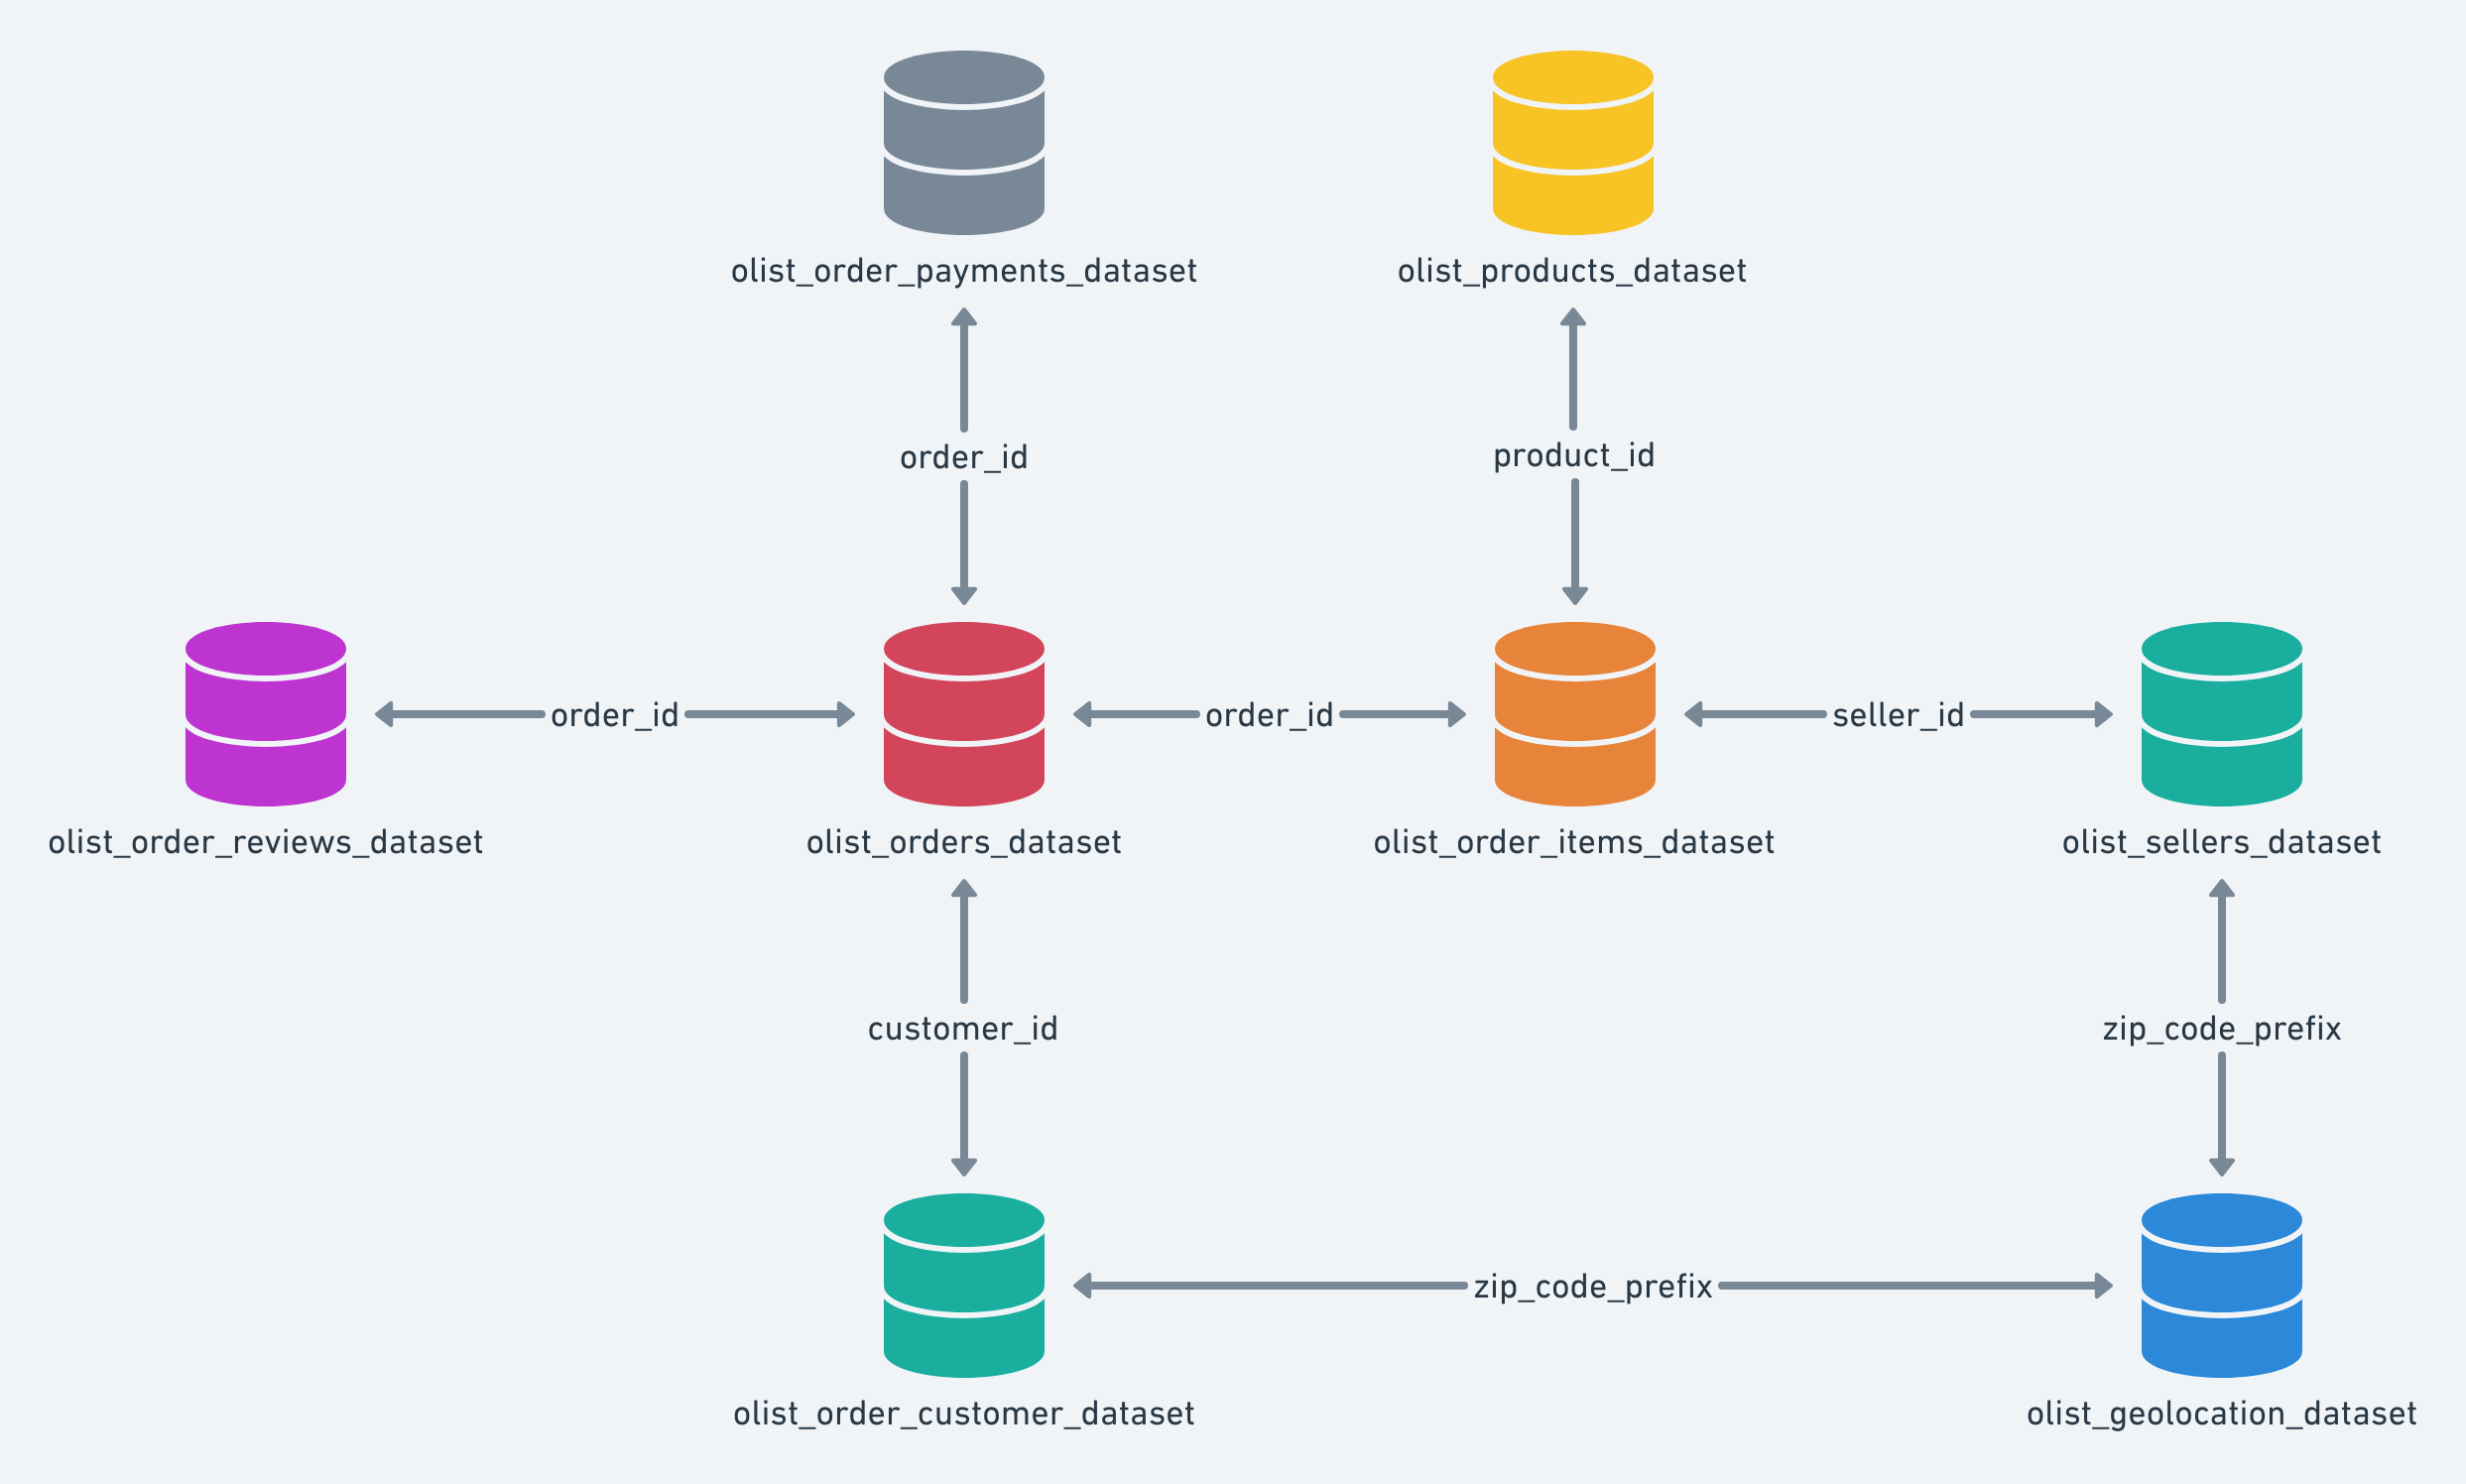

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
#from wordcloud import WordCloud

import warnings
warnings.filterwarnings( 'ignore' )

sns.set(style='darkgrid')
plt.rcParams["figure.figsize"] = [11, 6]

In [ ]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="center")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [ ]:
df_order_payments=  pd.read_csv('/content/olist_order_payments_dataset.csv')
df_order_reviews = pd.read_csv('/content/olist_order_reviews_dataset.csv')
df_customers = pd.read_csv('/content/olist_customers_dataset.csv')
df_order_items = pd.read_csv('/content/olist_order_items_dataset.csv')
df_orders = pd.read_csv('/content/olist_orders_dataset.csv')
df_geolocation = pd.read_csv('/content/olist_geolocation_dataset.csv')
df_products= pd.read_csv('/content/olist_products_dataset.csv')
df_sellers = pd.read_csv('/content/olist_sellers_dataset.csv')
df_translation =pd.read_csv('/content/product_category_name_translation.csv')

# dataset

## df_payments

In [ ]:
df_order_payments.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [ ]:
df_order_payments['total_payment'] = df_order_payments['payment_value'] * df_order_payments['payment_installments']

In [ ]:
df_order_payments.drop(labels=['payment_sequential','payment_installments','payment_value'],axis=1, inplace=True) 

In [ ]:
df_order_payments.columns

Index(['order_id', 'payment_type', 'total_payment'], dtype='object')

In [ ]:
df_order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       103886 non-null  object 
 1   payment_type   103886 non-null  object 
 2   total_payment  103886 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.4+ MB


In [ ]:
df_order_payments.isnull().sum().sum()

0

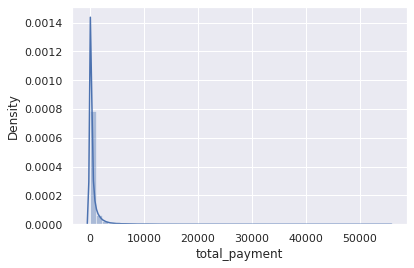

In [ ]:
sns.distplot(df_order_payments["total_payment"])

## df_reviews

In [ ]:
df_order_reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [ ]:
df_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
df_order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [ ]:
df_order_reviews_title = df_order_reviews['review_comment_title']
review_data_title = df_order_reviews_title.dropna()
review_data_title.head()


9                   recomendo
15            Super recomendo
19    Não chegou meu produto 
22                      Ótimo
34                 Muito bom.
Name: review_comment_title, dtype: object

In [ ]:
#dropping columns comment title
df_order_reviews = df_order_reviews.drop(['review_comment_title','review_creation_date','review_answer_timestamp'],axis=1)  

In [ ]:
df_order_reviews.fillna("No Message", inplace = True)

In [ ]:
df_order_reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score                             review_comment_message  
0             4                                         No Message  
1             5                                         No Message  
2             5                                         No Message  
3             5              Recebi bem antes do prazo estipulado.  
4             5  Parabéns lojas lannister adorei comprar pela I...

In [ ]:
df_order_reviews['review_comment_message'] = df_order_reviews['review_comment_message'].str.strip().str.lower()

In [ ]:
df_order_reviews.groupby('review_score').count()

review_id  order_id  review_comment_message
review_score                                             
1                 11424     11424                   11424
2                  3151      3151                    3151
3                  8179      8179                    8179
4                 19142     19142                   19142
5                 57328     57328                   57328

## df_customers

In [ ]:
df_customers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [ ]:
df_customers.customer_city.nunique()

4119

##df_order_items 

In [ ]:
df_order_items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [ ]:
df_order_items.drop(labels=['shipping_limit_date','order_item_id'], axis=1, inplace=True)

In [ ]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   product_id     112650 non-null  object 
 2   seller_id      112650 non-null  object 
 3   price          112650 non-null  float64
 4   freight_value  112650 non-null  float64
dtypes: float64(2), object(3)
memory usage: 4.3+ MB


In [ ]:
df_order_items.isnull().sum().sum()

0

In [ ]:
df_order_items.columns

Index(['order_id', 'product_id', 'seller_id', 'price', 'freight_value'], dtype='object')

## df_orders

### preprocessing

In [ ]:
df_orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [ ]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
df_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

delivered: delivery to the customer finished.

shipped: payment finished and delivery started accordingly.

invoiced / approved / processing: payment finished and waiting for the start of delivery

unavailable: It might be the cancellation from the seller's side due to the shortage of the inventory because we can realize that there is the datetime value on approved_at column.

canceled: Some rows have the datetime value on approved_at, delivered_carrier_date, and delivered_customer_date. It means that the canceled order would be the cancellation from the customer's side.

In [ ]:
df_orders_before=df_orders.copy()   #copying data before deleting nan rows
df_orders_before.groupby('order_status').count()

order_id  customer_id  order_purchase_timestamp  \
order_status                                                    
approved             2            2                         2   
canceled           625          625                       625   
created              5            5                         5   
delivered        96478        96478                     96478   
invoiced           314          314                       314   
processing         301          301                       301   
shipped           1107         1107                      1107   
unavailable        609          609                       609   

              order_approved_at  order_delivered_carrier_date  \
order_status                                                    
approved                      2                             0   
canceled                    484                            75   
created                       0                             0   
delivered                 96464                         96476   
invoiced                    314                             0   
processing                  301                             0   
shipped                    1107                          1107   
unavailable                 609                             0   

              order_delivered_customer_date  order_estimated_delivery_date  
order_status                                                                
approved                                  0                              2  
canceled                                  6                            625  
created                                   0                              5  
delivered                             96470                          96478  
invoiced                                  0                            314  
processing                                0                            301  
shipped                                   0                           1107  
unavailable                               0                            609

In [ ]:
df_orders.dropna(axis=0,inplace=True)   #cleaning nan values

### analysing

In [ ]:
df_orders.drop(labels=['order_approved_at','order_delivered_carrier_date'], axis=1, inplace=True)

In [ ]:
df_orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp order_delivered_customer_date  \
0    delivered      2017-10-02 10:56:33           2017-10-10 21:25:13   
1    delivered      2018-07-24 20:41:37           2018-08-07 15:27:45   
2    delivered      2018-08-08 08:38:49           2018-08-17 18:06:29   
3    delivered      2017-11-18 19:28:06           2017-12-02 00:28:42   
4    delivered      2018-02-13 21:18:39           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [ ]:
df_orders.groupby('order_status').count()

order_id  customer_id  order_purchase_timestamp  \
order_status                                                    
canceled             6            6                         6   
delivered        96455        96455                     96455   

              order_delivered_customer_date  order_estimated_delivery_date  
order_status                                                                
canceled                                  6                              6  
delivered                             96455                          96455

## df_products

### preprocessing

In [ ]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
df_products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
df_products.dropna(axis=0,inplace=True)

### analysing

In [ ]:
df_products.drop(labels=['product_name_lenght', 'product_description_lenght','product_photos_qty'],axis=1,inplace=True)

In [ ]:
df_products.head()

product_id  product_category_name  product_weight_g  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria             225.0   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes            1000.0   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer             154.0   
3  cef67bcfe19066a932b7673e239eb23d                  bebes             371.0   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas             625.0   

   product_length_cm  product_height_cm  product_width_cm  
0               16.0               10.0              14.0  
1               30.0               18.0              20.0  
2               18.0                9.0              15.0  
3               26.0                4.0              26.0  
4               20.0               17.0              13.0

## df_geolocation

In [ ]:
df_geolocation.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [ ]:
df_geolocation.drop(labels=['geolocation_city',	'geolocation_state'], axis=1, inplace=True)

In [ ]:
df_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 3 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 22.9 MB


In [ ]:
df_geolocation.isnull().sum().sum()

0

In [ ]:
df_geolocation = df_geolocation[~df_geolocation['geolocation_zip_code_prefix'].duplicated()]

## df_sellers

In [ ]:
df_sellers.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [ ]:
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
df_sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

## df_translation

In [ ]:
df_translation.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

In [ ]:
df_translation['product_category_name_english'] = df_translation['product_category_name_english'].str.replace('_', ' ').str.lower()

In [ ]:
df_translation.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

# merge

In [ ]:
df_names = ['df_customers','df_geolocation', 'df_orders', 'df_order_items','df_order_payments',
            'df_order_reviews','df_products','df_sellers','df_translation']
for df in df_names:
    print("Dataset {} has shape {}".format(df, eval(df).shape))

Dataset df_customers has shape (99441, 5)
Dataset df_geolocation has shape (19015, 3)
Dataset df_orders has shape (96461, 6)
Dataset df_order_items has shape (112650, 5)
Dataset df_order_payments has shape (103886, 3)
Dataset df_order_reviews has shape (99224, 4)
Dataset df_products has shape (32340, 6)
Dataset df_sellers has shape (3095, 4)
Dataset df_translation has shape (71, 2)


In [ ]:
# Lets check the null values:

for df in df_names:
    print("In {} there are approximately {} null values".format(df, eval(df).isnull().sum().sum()))

In df_customers there are approximately 0 null values
In df_geolocation there are approximately 0 null values
In df_orders there are approximately 0 null values
In df_order_items there are approximately 0 null values
In df_order_payments there are approximately 0 null values
In df_order_reviews there are approximately 0 null values
In df_products there are approximately 0 null values
In df_sellers there are approximately 0 null values
In df_translation there are approximately 0 null values


In [ ]:
df = pd.merge(df_orders,df_order_payments, on="order_id")
df = pd.merge(df,df_customers, on="customer_id")
df = pd.merge(df,df_order_items, on="order_id")
df = pd.merge(df,df_sellers, on="seller_id")
df = pd.merge(df,df_order_reviews, on="order_id")
df = pd.merge(df,df_products, on="product_id")
df = pd.merge(df,df_translation, on="product_category_name")
df.shape

(113193, 28)

In [ ]:
df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
4  0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   

  order_status order_purchase_timestamp order_delivered_customer_date  \
0    delivered      2017-10-02 10:56:33           2017-10-10 21:25:13   
1    delivered      2017-10-02 10:56:33           2017-10-10 21:25:13   
2    delivered      2017-10-02 10:56:33           2017-10-10 21:25:13   
3    delivered      2017-08-15 18:29:31           2017-08-18 14:44:43   
4    delivered      2017-08-02 18:24:47           2017-08-07 18:30:01   

  order_estimated_delivery_date payment_type  total_payment  \
0           2017-10-18 00:00:00  credit_card          18.12   
1           2017-10-18 00:00:00      voucher           2.00   
2           2017-10-18 00:00:00      voucher          18.59   
3           2017-08-28 00:00:00  credit_card         113.31   
4           2017-08-15 00:00:00  credit_card          37.77   

                 customer_unique_id  customer_zip_code_prefix  ...  \
0  7c396fd4830fd04220f754e42b4e5bff                      3149  ...   
1  7c396fd4830fd04220f754e42b4e5bff                      3149  ...   
2  7c396fd4830fd04220f754e42b4e5bff                      3149  ...   
3  3a51803cc0d012c3b5dc8b7528cb05f7                      3366  ...   
4  ef0996a1a279c26e7ecbd737be23d235                      2290  ...   

  seller_state                         review_id review_score  \
0           SP  a54f0611adc9ed256b57ede6b6eb5114            4   
1           SP  a54f0611adc9ed256b57ede6b6eb5114            4   
2           SP  a54f0611adc9ed256b57ede6b6eb5114            4   
3           SP  b46f1e34512b0f4c74a72398b03ca788            4   
4           SP  dc90f19c2806f1abba9e72ad3c350073            5   

                              review_comment_message  product_category_name  \
0  não testei o produto ainda, mas ele veio corre...  utilidades_domesticas   
1  não testei o produto ainda, mas ele veio corre...  utilidades_domesticas   
2  não testei o produto ainda, mas ele veio corre...  utilidades_domesticas   
3  deveriam embalar melhor o produto. a caixa vei...  utilidades_domesticas   
4  só achei ela pequena pra seis xícaras ,mais é ...  utilidades_domesticas   

   product_weight_g  product_length_cm product_height_cm product_width_cm  \
0             500.0               19.0               8.0             13.0   
1             500.0               19.0               8.0             13.0   
2             500.0               19.0               8.0             13.0   
3             500.0               19.0               8.0             13.0   
4             500.0               19.0               8.0             13.0   

  product_category_name_english  
0                    housewares  
1                    housewares  
2                    housewares  
3                    housewares  
4                    housewares  

[5 rows x 28 columns]

In [ ]:
df.shape

(113193, 28)

# EDA

In [ ]:
df.customer_unique_id.nunique()  #unique customer count

91465

In [ ]:
df.seller_id.nunique()    #unique sller count

2907

## top 10 total number of orders by each city

In [ ]:
counts=df.customer_city.value_counts(sort=True)

In [ ]:
popular_labels=counts.index[:10]      #getting first 10 city 

colors=['lightslategray',]*len(popular_labels)    #coloring 
colors[0]='maroon'

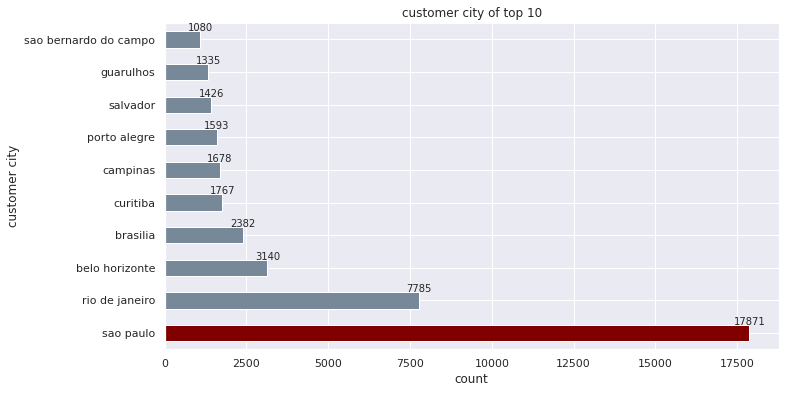

In [ ]:
plt.rcParams["figure.figsize"] = [11, 6]

plt_cust=df.customer_city.value_counts().nlargest(10).plot(kind='barh',color =colors)
show_values_on_bars(plt_cust, "h",0.1)
plt.title('customer city of top 10')
plt.xlabel("count")
plt.ylabel("customer city")
plt.show()

In [ ]:
from plotly.offline import iplot
import plotly.graph_objs as go

In [ ]:
fig=go.Figure(data=[go.Bar(x=counts[:15],y=popular_labels,marker_color=colors,orientation='h')])
fig.update_layout(title_text='Most represented customer_city in the Dataset',
                  xaxis_title="Percentage",yaxis_title="city",
                  height=600, width=1000,)
fig.show()

## Identifying high value customers frequency 

In [ ]:
customer_total_payment=df.groupby("customer_unique_id")[['total_payment']].sum().sort_values(by="total_payment",ascending=False).reset_index()
customer_total_payment.head()

customer_unique_id  total_payment
0  38a4f1deb45ca914dd13c73b41775d71      345624.00
1  eae0a83d752b1dd32697e0e7b4221656      237807.54
2  3d47f4368ccc8e1bb4c4a12dbda7111b      223466.00
3  adfa1cab2b2c8706db21bb13c0a1beb1      194570.40
4  0f5ac8d5c31de21d2f25e24be15bbffb      184805.01

In [ ]:
# frequency
frequency = df.groupby('customer_unique_id')['order_id'].count().reset_index()
frequency.columns = ['customer_unique_id', 'frequency']
frequency.head()

customer_unique_id  frequency
0  0000366f3b9a7992bf8c76cfdf3221e2          1
1  0000b849f77a49e4a4ce2b2a4ca5be3f          1
2  0000f46a3911fa3c0805444483337064          1
3  0000f6ccb0745a6a4b88665a16c9f078          1
4  0004aac84e0df4da2b147fca70cf8255          1

In [ ]:
# merge the two dfs
grouped_df = pd.merge(customer_total_payment, frequency, on='customer_unique_id', how='inner')
grouped_df.head()

customer_unique_id  total_payment  frequency
0  38a4f1deb45ca914dd13c73b41775d71      345624.00         10
1  eae0a83d752b1dd32697e0e7b4221656      237807.54         15
2  3d47f4368ccc8e1bb4c4a12dbda7111b      223466.00         10
3  adfa1cab2b2c8706db21bb13c0a1beb1      194570.40          6
4  0f5ac8d5c31de21d2f25e24be15bbffb      184805.01         18

In [ ]:
import plotly.express as px

fig = px.scatter(grouped_df, x="total_payment", y="frequency", trendline="ols")

fig.update_layout(title_text='Total payment and Order Frequency',
                  height=600, width=1000,)
fig.show()

## Top 10 Most Ordered and Least Ordered Product

In [ ]:
df.product_category_name_english.nunique()  #number of unique product name

71

In [ ]:
df.product_category_name_english.value_counts().nlargest(10).values

array([11684,  9749,  8734,  8554,  7926,  7154,  6030,  4578,  4451,
        4259])

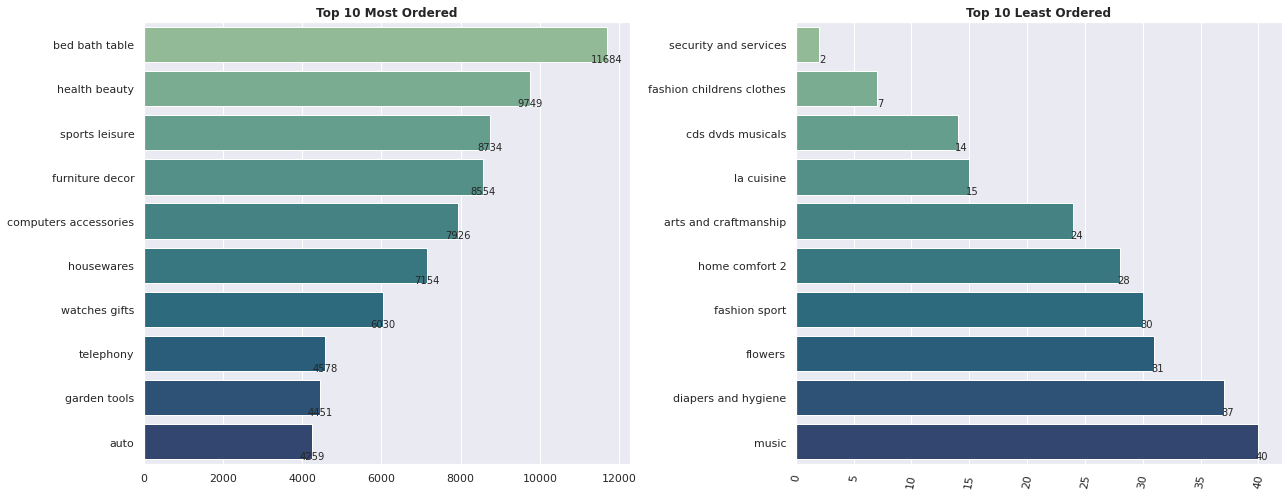

In [ ]:
fig, axs = plt.subplots(1, 2,  figsize=(18,7))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

category_top=df.product_category_name_english.value_counts().nlargest(10).index
values_top=df.product_category_name_english.value_counts().nlargest(10).values


category_bottom=df.product_category_name_english.value_counts().nsmallest(10).index
values_bottom=df.product_category_name_english.value_counts().nsmallest(10).values



sns_top=sns.barplot(ax=axs[0], y=category_top , x=values_top, data=df,palette="crest")
axs[0].set_title('Top 10 Most Ordered',fontweight='bold')

sns_bottom=sns.barplot(ax=axs[1], y=category_bottom , x=values_bottom, data=df,palette="crest")
axs[1].set_title('Top 10 Least Ordered',fontweight='bold')

show_values_on_bars(sns_top, "h", 0.3)
show_values_on_bars(sns_bottom, "h", 0.3)
plt.xticks(rotation=80)

plt.tight_layout()
plt.savefig('product.png', dpi=200)
plt.show();

## Regionwise seller and customer

In [ ]:
df.seller_state.unique()

array(['SP', 'RS', 'PR', 'MG', 'SC', 'RJ', 'DF', 'ES', 'CE', 'PB', 'GO',
       'PE', 'MT', 'BA', 'MS', 'RN', 'PA', 'MA', 'RO', 'PI', 'SE', 'AM'],
      dtype=object)

In [ ]:
df.customer_state.unique()

array(['SP', 'SC', 'RJ', 'MG', 'RS', 'PR', 'AM', 'GO', 'MA', 'RN', 'PI',
       'PA', 'PE', 'ES', 'BA', 'MT', 'RO', 'DF', 'MS', 'PB', 'AP', 'SE',
       'CE', 'AL', 'TO', 'AC', 'RR'], dtype=object)

In [ ]:
# Seting regions
sudeste = ['SP', 'RJ', 'ES','MG']
nordeste= ['MA', 'PI', 'CE', 'RN', 'PE', 'PB', 'SE', 'AL', 'BA']
norte =  ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC']
centro_oeste = ['MT', 'GO', 'MS' ,'DF' ]
sul = ['SC', 'RS', 'PR']

df.loc[df['customer_state'].isin(sudeste), 'cust_Region'] = 'Southeast'
df.loc[df['customer_state'].isin(nordeste), 'cust_Region'] = 'Northeast'
df.loc[df['customer_state'].isin(norte), 'cust_Region'] = 'North'
df.loc[df['customer_state'].isin(centro_oeste), 'cust_Region'] = 'Midwest'
df.loc[df['customer_state'].isin(sul), 'cust_Region'] = 'South'

df.loc[df['seller_state'].isin(sudeste), 'cust_Region_seller'] = 'Southeast'
df.loc[df['seller_state'].isin(nordeste), 'cust_Region_seller'] = 'Northeast'
df.loc[df['seller_state'].isin(norte), 'cust_Region_seller'] = 'North'
df.loc[df['seller_state'].isin(centro_oeste), 'cust_Region_seller'] = 'Midwest'
df.loc[df['seller_state'].isin(sul), 'cust_Region_seller'] = 'South'


In [ ]:
cust_reg_val= df.cust_Region.value_counts().values
cust_reg_ind= df.cust_Region.value_counts().index

seller_reg_val= df.cust_Region_seller.value_counts().values
seller_reg_ind= df.cust_Region_seller.value_counts().index

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['customer regionwise', 'seller regionwise',])

fig.add_trace(go.Pie(labels=cust_reg_ind, values=cust_reg_val, name="cust_Region", pull=[0.2, 0, 0, 0], textinfo='label+percent',
                             insidetextorientation='radial'),1, 1)

fig.add_trace(go.Pie(labels=seller_reg_ind, values=seller_reg_val, name="cust_Region_seller", pull=[0.2, 0, 0, 0] ,textinfo='label+percent',
                             insidetextorientation='radial'),1, 2)

fig = go.Figure(fig)
fig.show()

## merge with seller and cust geolocation

In [ ]:
df= pd.merge(df, df_geolocation[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']],
             left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix').rename(columns={'geolocation_lat': 'seller_lat', 
                                                                                                        'geolocation_lng': 'seller_lon'})
df = pd.merge(df, df_geolocation[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']],
                    left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix').rename(columns={'geolocation_lat': 'customer_lat', 
                                                                                                              'geolocation_lng': 'customer_lon'})
              

In [ ]:
import geopy.distance


def geodesic(lon1, lat1, lon2, lat2):
    coords_1 = (lat1, lon1)
    coords_2 = ( lat2, lon2)
    return geopy.distance.distance(coords_1, coords_2).km

df['distance'] = df.apply(
    lambda row: geodesic(
        row["seller_lon"],
        row["seller_lat"],
        row["customer_lon"],
        row["customer_lat"],
    ),
    axis=1,
)


### installing

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.5 MB/s 
     |████████████████████████████████| 6.3 MB 44.2 MB/s 
     |████████████████████████████████| 16.7 MB 380 kB/s 


In [ ]:
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install geos

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 400 kB 5.3 MB/s 


## seller and customer geo

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px


In [ ]:
#using geopandas to convert seller long and Lat to points
df_geo_seller = gpd.GeoDataFrame(df, geometry= gpd.points_from_xy(df.seller_lon, df.seller_lat))

In [ ]:
#get built in dataset from geopandas
world_data=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_cities =gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

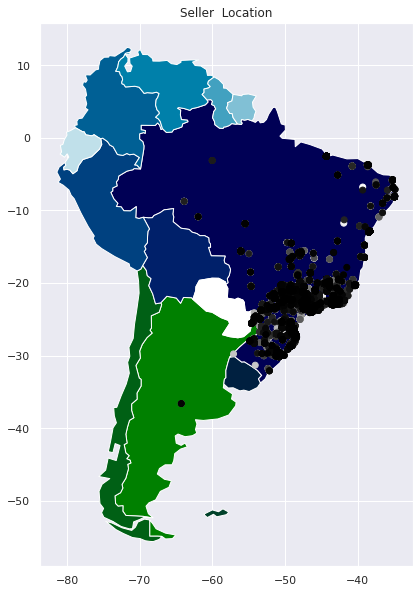

In [ ]:
#plot world map
fig, ax = plt.subplots(figsize=(10,10))
world_data[world_data.continent == 'South America' ].plot(ax=ax,cmap='ocean')

df_geo_seller.plot( ax=ax, cmap='Greys', 
                     legend=True, legend_kwds={"label": "Participation", "orientation":"horizontal"})
ax.set_title("Seller  Location")
plt.show()

In [ ]:
#using geopandas to convert cust long and Lat to points
df_geo_customer = gpd.GeoDataFrame(df, geometry= gpd.points_from_xy(df.customer_lon, df.customer_lat))

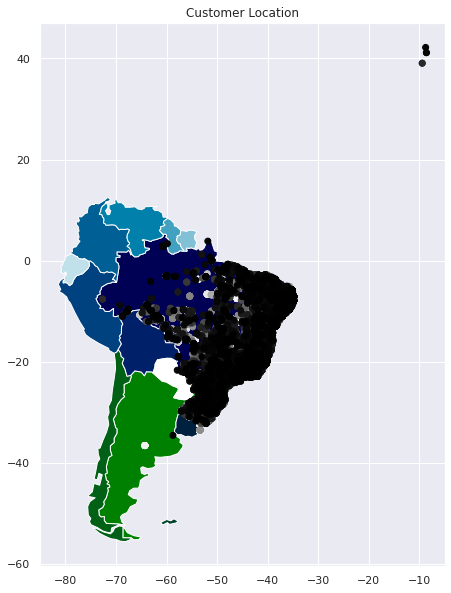

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
world_data[world_data.continent == 'South America' ].plot(ax=ax,cmap='ocean')

df_geo_customer.plot( ax=ax, cmap='Greys', 
                     legend=True, legend_kwds={"label": "Participation", "orientation":"horizontal"})
ax.set_title("Customer Location")
plt.show()

## calculating delay delivered time

In [ ]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'], format='%Y-%m-%d %H:%M:%S')
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
df['product_volume_cm3']=df.product_height_cm*df.product_length_cm*df.product_width_cm
df['density']=df['product_weight_g']/df['product_volume_cm3']

In [ ]:
#calculating difference of delivered and estimated time difference from customers purchase date
df['delivered'] = df['order_delivered_customer_date'].dt.date - df['order_purchase_timestamp'].dt.date
df['wait_time'] = df['order_estimated_delivery_date'].dt.date - df['order_purchase_timestamp'].dt.date
df['delay']     = df['wait_time'] - df['delivered'] 

In [ ]:
delay_df = df[df.delay/ np.timedelta64(1, 'D')  <0 ]
delay_df.head()

order_id                       customer_id  \
11   9b95a53cadb5a007d0928bd00265ea08  5686c502f1da3eb97a6b7624efcbee25   
21   aab7b04f45546e03e7c86b9e8f12368e  23549dc8454087a9e2266d05c5de7602   
22   aab7b04f45546e03e7c86b9e8f12368e  23549dc8454087a9e2266d05c5de7602   
140  423c157cb61f228b20c08e79cd28b9b9  26986b28dd538116e65c5b88c0e050b9   
224  c49be9a11fd13933307cc6a19b03a895  a972623b3481cbfd95fa776b0067e554   

    order_status order_purchase_timestamp order_delivered_customer_date  \
11     delivered      2018-02-27 16:35:46           2018-04-05 20:29:39   
21     delivered      2018-02-22 23:12:56           2018-04-11 17:51:25   
22     delivered      2018-02-22 23:12:56           2018-04-11 17:51:25   
140    delivered      2018-02-05 19:49:01           2018-02-26 20:23:48   
224    delivered      2018-05-15 18:54:39           2018-06-06 13:27:44   

    order_estimated_delivery_date payment_type  total_payment  \
11                     2018-03-29       boleto          25.00   
21                     2018-03-22       boleto         101.84   
22                     2018-03-22       boleto         101.84   
140                    2018-02-22  credit_card        1661.84   
224                    2018-05-30       boleto         928.68   

                   customer_unique_id  customer_zip_code_prefix  ...  \
11   f7418da0b5217827ec706c9c0cd8a886                     98600  ...   
21   6a9d8ebad6be7bdae3088a5416e7fe99                     65077  ...   
22   6a9d8ebad6be7bdae3088a5416e7fe99                     65077  ...   
140  b56d31572e47b1e6d1b88d3128f2226b                      9280  ...   
224  b9cc54385a16364650ea5c9d26c212d9                     36570  ...   

    product_weight_g product_length_cm product_height_cm product_width_cm  \
11             100.0              21.0               9.0             13.0   
21             225.0              31.0              13.0             28.0   
22             225.0              31.0              13.0             28.0   
140           4900.0              60.0              15.0             36.0   
224           1400.0              43.0              18.0             18.0   

     product_category_name_english  product_volume_cm3   density delivered  \
11                      housewares              2457.0  0.040700   37 days   
21                      housewares             11284.0  0.019940   48 days   
22                      housewares             11284.0  0.019940   48 days   
140                     housewares             32400.0  0.151235   21 days   
224                     housewares             13932.0  0.100488   22 days   

    wait_time    delay  
11    30 days  -7 days  
21    28 days -20 days  
22    28 days -20 days  
140   17 days  -4 days  
224   15 days  -7 days  

[5 rows x 33 columns]

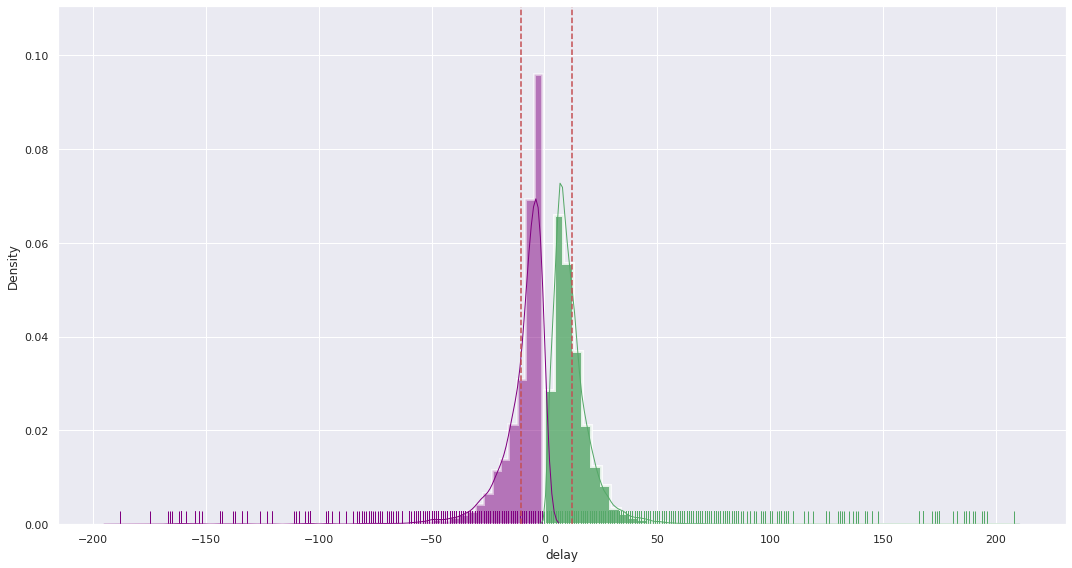

In [ ]:
plt.figure(figsize=(15,8))

sns.distplot(df.delivered/ np.timedelta64(1, 'D'),rug=True, rug_kws={"color": "g"},
                                                            kde_kws={"color": "g", "lw": 1, "label": "KDE"},   #vizulazing delivered orders
                                                            hist_kws={"histtype": "stepfilled", "linewidth": 3,
                                                            "alpha": 0.8, "color": "g"})
delay_df = df[df.delay/ np.timedelta64(1, 'D')  <0 ]
sns.distplot(delay_df.delay/ np.timedelta64(1, 'D'), rug=True, rug_kws={"color": "purple"},                 #visualizing delay  orders
                                              kde_kws={"color": "purple", "lw": 1, "label": "KDE"},
                                              hist_kws={"histtype": "stepfilled", "linewidth": 3,
                                              "alpha": 0.5, "color": "purple"})

plt.axvline( (df.delivered/ np.timedelta64(1, 'D') ).mean(), color='r', linestyle="--")
plt.axvline( (delay_df.delay/ np.timedelta64(1, 'D') ).mean(), color='r', linestyle="--")

plt.tight_layout()
plt.savefig('delierdelay.png', dpi=200)
plt.show();

In [ ]:
df['est_to_deliver'] = np.where( df.delay/ np.timedelta64(1, 'D')  < 0, 'late deliver', 'on time deliver')

In [ ]:
import plotly.express as px
fig = px.pie(df, values=df.est_to_deliver.value_counts().values , names=df.est_to_deliver.value_counts().index, title='deliver status dist.')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
conditions = [(df.delay/ np.timedelta64(1, 'D') < -14),
              (df.delay/ np.timedelta64(1, 'D') <= -7),
              (df.delay/ np.timedelta64(1, 'D') < 0  )]
choices = ['late over 2 weeks', 'late from 7 days to 14 days','late under 1 week']
df['est_to_deliver_detail'] = np.select(conditions, choices, default='on time deliver')

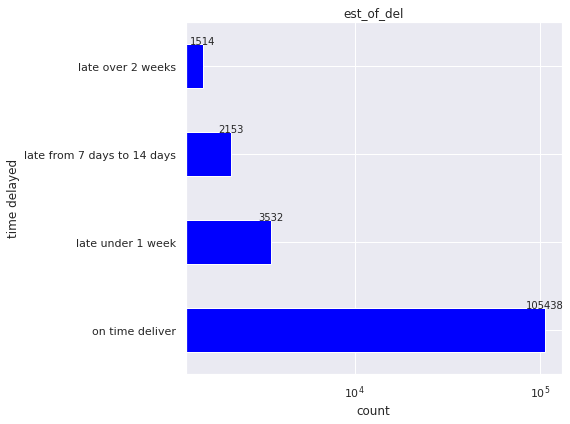

In [ ]:
plt.rcParams["figure.figsize"] = [8, 6]

est_of_del=df.est_to_deliver_detail.value_counts().plot(kind='barh', cmap='winter')
show_values_on_bars(est_of_del, "h",0.1)
plt.title('est_of_del')
plt.xlabel("count")
plt.ylabel("time delayed")
plt.xscale("log")


plt.tight_layout()
plt.savefig('delaytime.png', dpi=200)
plt.show()

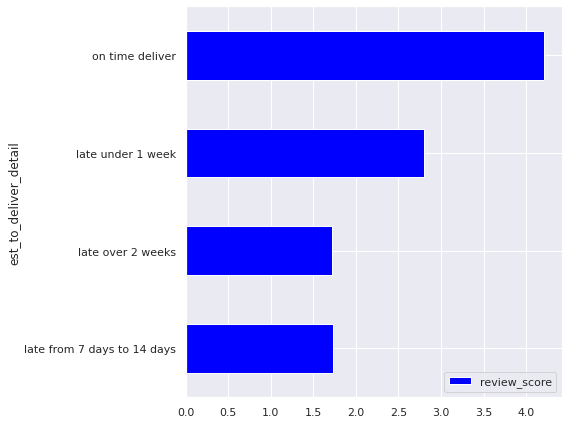

In [ ]:
plt.rcParams["figure.figsize"] = [8, 6]

review_score_by_delivered_time=df.pivot_table(values='review_score', index='est_to_deliver_detail', aggfunc='mean')
review_score_by_delivered_time.plot(kind='barh',cmap='winter')

plt.tight_layout()
plt.savefig('scoredelay.png', dpi=200)
plt.show()

In [ ]:
seller_pv=df.pivot_table(values='order_id',index='seller_id', aggfunc='nunique')
seller_pv.reset_index(inplace=True)
seller_pv.rename(columns={"order_id": "unique_order"}, inplace=True)

In [ ]:
seller_late=delay_df.pivot_table(values='order_id',index='seller_id', aggfunc='nunique')
seller_late.reset_index(inplace=True)
seller_late.rename(columns={"order_id": "late_order"}, inplace=True)

In [ ]:
#calculate %late orders by seller
seller_summary=seller_pv.merge(seller_late, how="left", on='seller_id')
seller_summary.fillna(0, inplace=True)
seller_summary["percent_late_order"]=seller_summary.late_order*100/seller_summary.unique_order
seller_summary.sort_values("percent_late_order", ascending=False, inplace=True)
seller_summary.head(20)

#get avg orders per seller:
avg_ord_per_seller = pd.DataFrame(seller_pv.mean(numeric_only=True))
avg_ord_per_seller.reset_index(inplace=True)

#get seller with most %late order with 2 conditions: no of orders >= avg orders per seller & high %late orders:
seller_top=seller_summary[seller_summary['unique_order']>=avg_ord_per_seller.iloc[0,1]]
seller_top = seller_top.sort_values("percent_late_order", ascending=False)
seller_top_10 = seller_top.head(10)
seller_top_10.set_index('seller_id', inplace=True)

seller_top_10.columns.names = ['']
seller_top_styled = seller_top_10.style.background_gradient()
seller_top_styled

In [ ]:
df.cust_Region=df.cust_Region.astype("category")

In [ ]:
#region bazında reivew score  ve total_payment ına baktım.
state_grouped=df.groupby('cust_Region')[['total_payment','review_score']].aggregate({'review_score': ['count'], 'total_payment':['mean']}) .sort_values(by=('review_score','count'), ascending=False)
state_grouped

review_score total_payment
                   count          mean
cust_Region                           
Southeast          77637    638.569797
South              16188    735.990204
Northeast          10387   1023.049984
Midwest             6389    865.353781
North               2036    958.585717

In [ ]:
#checking delayed orders
delay_state_grouped=delay_df.groupby('cust_Region')[['total_payment','review_score']].aggregate({'review_score': [ 'count'], 'total_payment':['mean']}) .sort_values(by=('review_score','count'), ascending=False)
delay_state_grouped

review_score total_payment
                   count          mean
cust_Region                           
Southeast           4461    674.894988
Northeast           1279   1096.995473
South                895    753.735642
Midwest              399    584.531905
North                165    986.784848

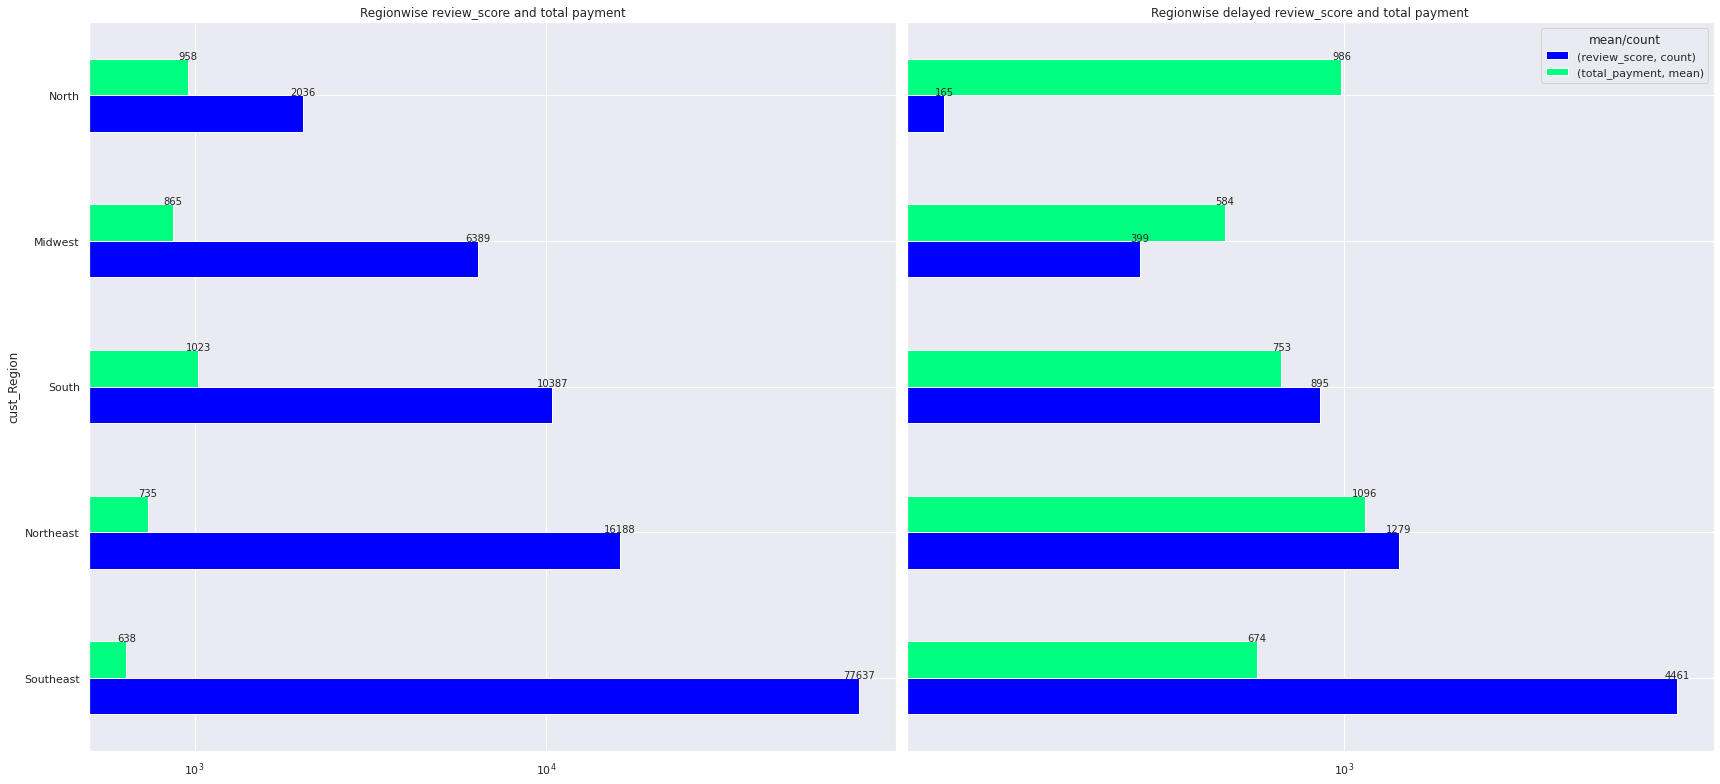

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(24,11), sharey=True )

sc=state_grouped.plot(kind='barh', logx=True, cmap='winter',ax=axs[0], legend=False)
show_values_on_bars(sc, "h",0.3)
axs[0].set_title("Regionwise review_score and total payment")

dl=delay_state_grouped.plot(kind='barh', logx=True, cmap='winter',ax=axs[1])
show_values_on_bars(dl, "h",0.3)
axs[1].set_title("Regionwise delayed review_score and total payment")

plt.legend(title='mean/count',fancybox=True)

plt.tight_layout()
plt.savefig('regionwise.png', dpi=200)
plt.show()

### geopandas  of delay orders

In [ ]:
df_geo_delay = gpd.GeoDataFrame(delay_df, geometry= gpd.points_from_xy(delay_df.seller_lon, delay_df.seller_lat))
df_geo_delay.shape

(7199, 43)

In [ ]:
df_geo_delay.delay=(df_geo_delay.delay / np.timedelta64(1, 'D')).astype(int)
df_geo_delay.delivered=(df_geo_delay.delivered / np.timedelta64(1, 'D')).astype(int)
df_geo_delay.wait_time=(df_geo_delay.wait_time / np.timedelta64(1, 'D')).astype(int)

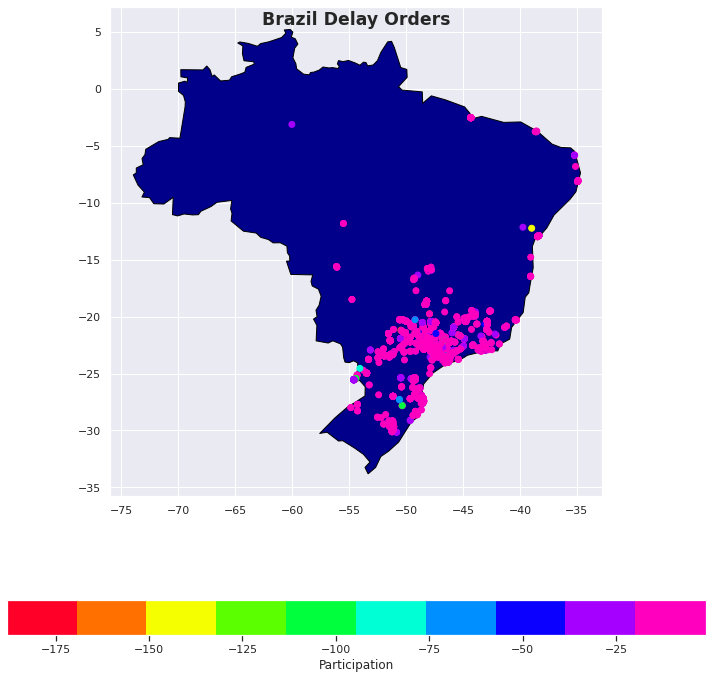

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(10,10))
fig.suptitle('Brazil Delay Orders',  fontsize = 'xx-large',   fontweight = 'bold')
cmap = matplotlib.cm.get_cmap("gist_rainbow", 10)

axis=world_data[world_data.name == 'Brazil'].plot(color='darkblue', edgecolor='black', ax = ax)

df_geo_delay.plot(ax=axis, column='delay', cmap=cmap, legend=True, legend_kwds={"label": "Participation", "orientation":"horizontal"})

plt.tight_layout()
plt.savefig('geodelay.png', dpi=200)
plt.show()

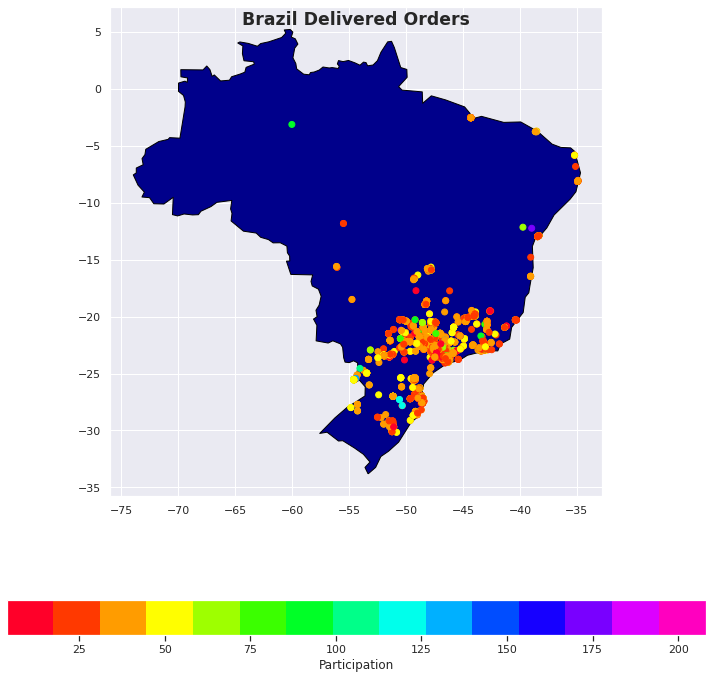

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(10,10))
fig.suptitle('Brazil Delivered Orders',  fontsize = 'xx-large',   fontweight = 'bold')
cmap = matplotlib.cm.get_cmap("gist_rainbow", 15)

axis=world_data[world_data.name == 'Brazil'].plot(color='darkblue', edgecolor='black', ax = ax)

df_geo_delay.plot(ax=axis, column='delivered', cmap=cmap, legend=True, legend_kwds={"label": "Participation", "orientation":"horizontal"})

plt.tight_layout()
plt.savefig('geodelivered.png', dpi=200)
plt.show()

## calculating distance between cust - seller of delayed orders

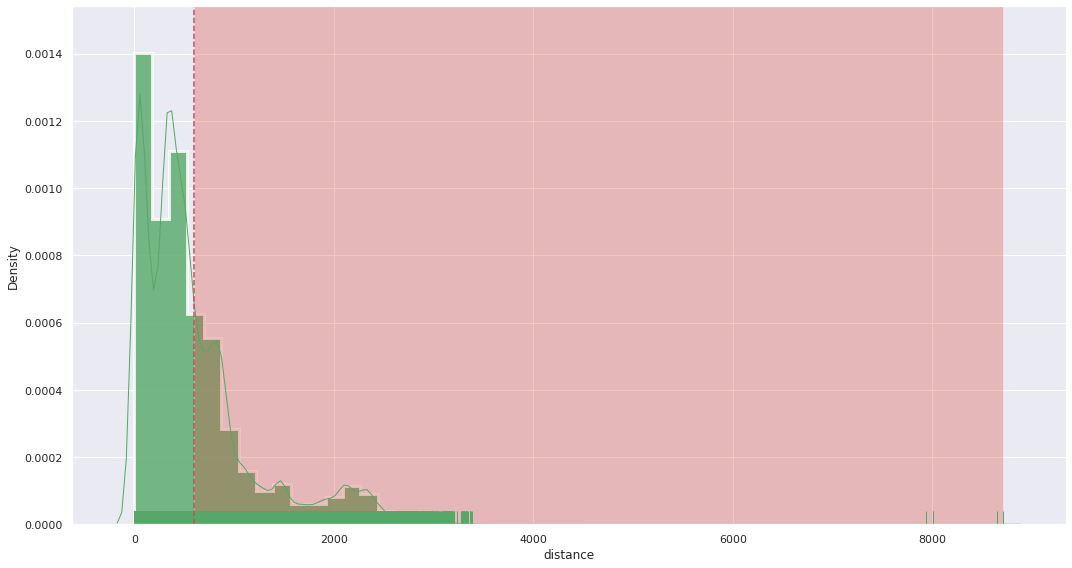

In [ ]:
plt.figure(figsize=(15,8))

ax= sns.distplot(df.distance,rug=True, rug_kws={"color": "g"},
                                                            kde_kws={"color": "g", "lw": 1, "label": "KDE"},   #vizulazing delivered orders
                                                            hist_kws={"histtype": "stepfilled", "linewidth": 3,
                                                            "alpha": 0.8, "color": "g"
                                                            })
plt.axvline( df.distance.mean(), color='r', linestyle="--")

ax.axvspan(df.distance.mean(),df.distance.max(), facecolor='#DB4437', alpha=0.3)

plt.tight_layout()
plt.savefig('distance2.png', dpi=200)
plt.show()

In [ ]:
df.groupby('est_to_deliver_detail')[['distance','delivered']].aggregate({'distance': [ 'mean'], 'delivered':['mean']}).sort_values(by=('delivered','mean'), ascending=False)

distance                  delivered
                                   mean                       mean
est_to_deliver_detail                                             
late over 2 weeks            847.939135 54 days 05:34:47.714663144
late from 7 days to 14 days  849.677627 33 days 19:31:47.849512308
late under 1 week            674.610727 24 days 20:09:14.473386183
on time deliver              584.084476 10 days 21:58:28.632561315

In [ ]:
filtered_df = df_geo_delay[['delivered','wait_time','delay','product_volume_cm3',	'density',	'distance', 'freight_value', 'product_category_name_english','review_score',
                              'price', 'total_payment' ,'order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date',]]

<Figure size 1152x432 with 0 Axes>

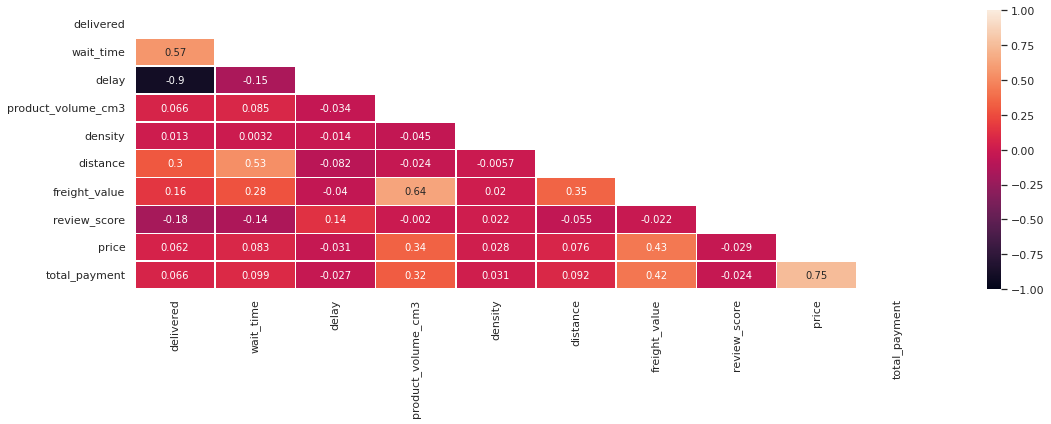

In [ ]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(filtered_df.corr(), dtype=np.bool))

cor = filtered_df.corr()
with sns.axes_style("white"):
  plt.figure(figsize=(16, 6))
  sns.heatmap(cor, annot=True, fmt=".2g", linewidths=0.5, mask=mask, vmin=-1, vmax=1)


plt.tight_layout()
plt.savefig('heatmap.png', dpi=200)

## custumer purchase time history 

İnternet sitesinin kullanılma oranını gösteren heatmap yapabilirsin

In [ ]:
df_orders_before.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
# 2016 customer purchase time
customer_usage2016 = df[(df['order_purchase_timestamp'] >= df.order_purchase_timestamp.min()) & (df['order_purchase_timestamp'] < '2017-01-01')]
customer_usage2016['date'] = customer_usage2016.order_purchase_timestamp.dt.strftime('%Y-%m')
customer_usage2016['hour'] = customer_usage2016.order_delivered_customer_date.dt.hour

# 2017 customer purchase time
customer_usage2017 = df[(df['order_purchase_timestamp'] >= '2017-01-01') & (df['order_purchase_timestamp'] < '2018-01-01')]
customer_usage2017['date'] = customer_usage2017.order_purchase_timestamp.dt.strftime('%Y-%m')
customer_usage2017['hour'] = customer_usage2017.order_delivered_customer_date.dt.hour

# 2018 customer purchase time
customer_usage2018 = df[(df['order_purchase_timestamp'] >= '2018-01-01') & (df['order_purchase_timestamp'] <= df.order_purchase_timestamp.max())]
customer_usage2018['date'] = customer_usage2018.order_purchase_timestamp.dt.strftime('%Y-%m')
customer_usage2018['hour'] = customer_usage2018.order_delivered_customer_date.dt.hour

In [ ]:
#2016
usage_2016 = customer_usage2016.groupby(['date','hour'])[['order_id']].count().reset_index()
usage_2016.columns = usage_2016.columns.str.replace('order_id', 'count')

#2017
usage_2017 = customer_usage2017.groupby(['date','hour'])[['order_id']].count().reset_index()
usage_2017.columns = usage_2017.columns.str.replace('order_id', 'count')

#2018
usage_2018 = customer_usage2018.groupby(['date','hour'])[['order_id']].count().reset_index()
usage_2018.columns = usage_2018.columns.str.replace('order_id', 'count')

<Figure size 1152x360 with 0 Axes>

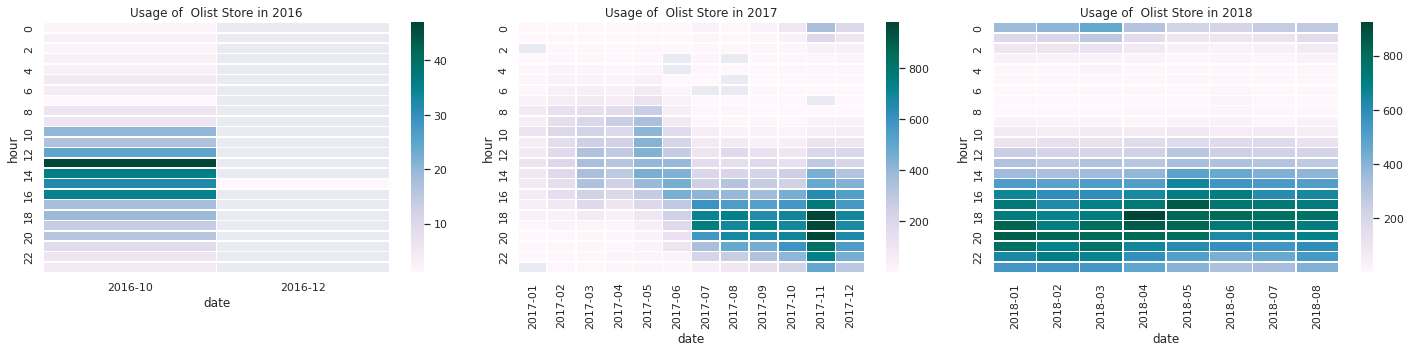

In [ ]:
plt.figure(figsize = (16,5))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,  figsize = (20,5))

sns.heatmap(usage_2016.pivot("hour", "date", "count"), annot=False, linewidths=.5 ,cmap="PuBuGn", ax=ax1)
ax1.set_title('Usage of  Olist Store in 2016')
sns.heatmap(usage_2017.pivot("hour", "date", "count"), annot=False, linewidths=.5 ,cmap="PuBuGn", ax=ax2)
ax2.set_title('Usage of  Olist Store in 2017')
sns.heatmap(usage_2018.pivot("hour", "date", "count"), annot=False, linewidths=.5 ,cmap="PuBuGn", ax=ax3)
ax3.set_title('Usage of  Olist Store in 2018')

plt.tight_layout()
plt.savefig('final.png', dpi=200)
plt.show();

WORDCOULD vaktin kalırsa

## WORLDCOULD

In [ ]:
pip install wordcloud 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
values=['No Message']
reviews=df_geo_delay.query("review_comment_message  not in @values  and review_score in ( 1, 2 ) ")

In [ ]:
reviews= reviews.sample(frac =.70)

In [ ]:
reviews.shape

(3173, 43)

### translator

In [ ]:
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.1 MB/s 
     |████████████████████████████████| 1.3 MB 12.3 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
     |████████████████████████████████| 65 kB 3.3 MB/s 
     |████████████████████████████████| 53 kB 2.1 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=3085b59bebba108743af3544b4da7017717cf9cf7a35cde92a297ed12d7db89d
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


In [ ]:
from googletrans import Translator

def translate_to_tr(text_to_tr):
    translator = Translator()
    translated_text = translator.translate(text_to_tr, dest='en' )
    return translated_text.text

reviews['transleted_reviews'] = reviews.apply(lambda row: translate_to_tr(row["review_comment_message"] ),axis=1,)

### wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS

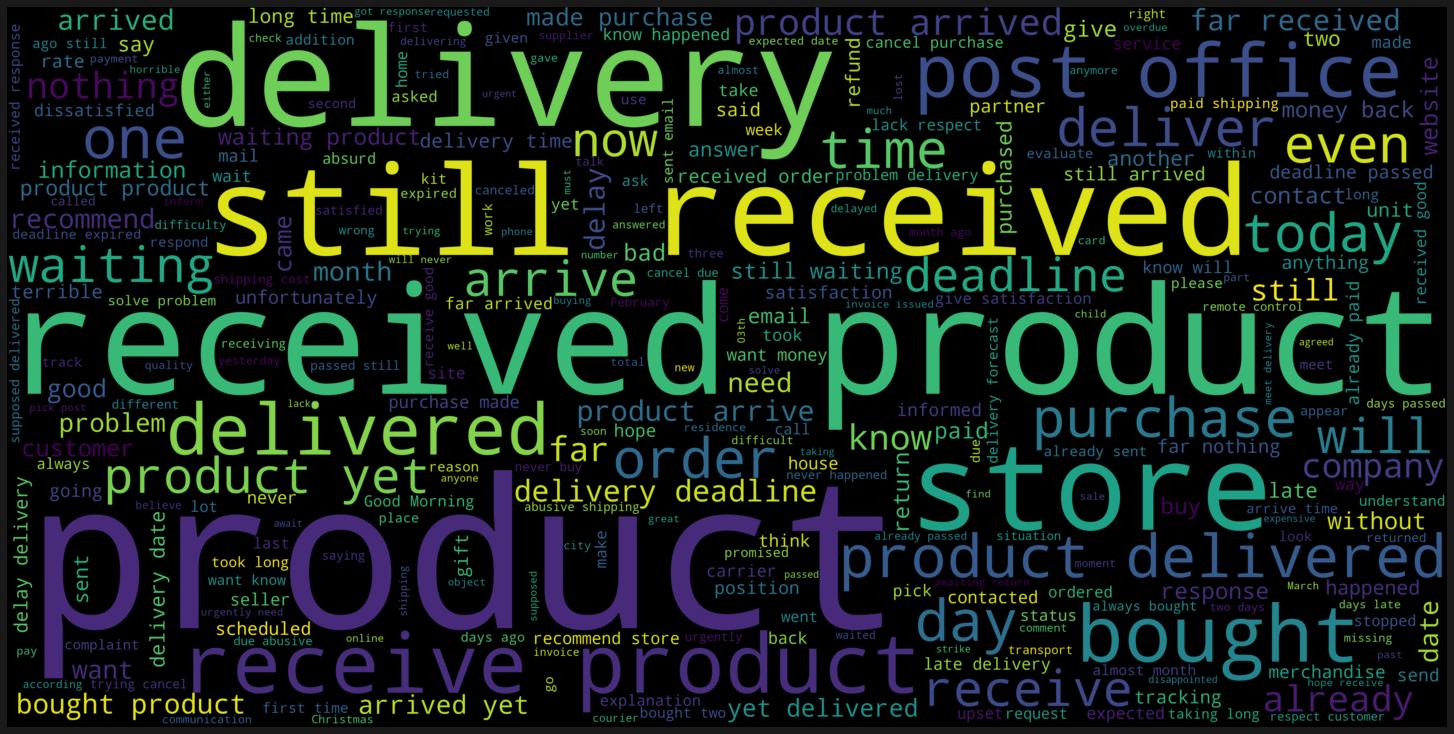

In [ ]:
soup = ' '.join(reviews.transleted_reviews)

# define the list of words you want to remove from the text
stop_words = [ "message",'targaryen', 'lannister', 'stark', 'greyjoy', 'baratheon', 'martell', 'tully', 'arryn','tyrell' ] + list(STOPWORDS)

wordcloud = WordCloud(stopwords = stop_words, width=5000, height=2500,max_words=300)
wordcloud.generate(soup)
plt.figure(figsize=(20,10),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)


plt.savefig('wordcloud.png', dpi=400)
plt.show()

# SLAYT LİNKİM

https://docs.google.com/presentation/d/1PGHiR1XEyt5_cPKpoKqca6K42_i_R25JRXKgrxAVLrc/edit?usp=sharing